# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
model = Sequential()

In [8]:
#將「輸入層」與「隱藏層」加入模型

In [9]:
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
model.add(Dropout(0.5))

In [11]:
#將「輸出層」加入模型

In [12]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
7s - loss: 0.3565 - acc: 0.8943 - val_loss: 0.1621 - val_acc: 0.9546
Epoch 2/10
7s - loss: 0.1601 - acc: 0.9531 - val_loss: 0.1166 - val_acc: 0.9660
Epoch 3/10
7s - loss: 0.1163 - acc: 0.9654 - val_loss: 0.0988 - val_acc: 0.9710
Epoch 4/10
7s - loss: 0.0928 - acc: 0.9724 - val_loss: 0.0914 - val_acc: 0.9719
Epoch 5/10
7s - loss: 0.0754 - acc: 0.9775 - val_loss: 0.0830 - val_acc: 0.9752
Epoch 6/10
7s - loss: 0.0622 - acc: 0.9807 - val_loss: 0.0760 - val_acc: 0.9766
Epoch 7/10
7s - loss: 0.0545 - acc: 0.9839 - val_loss: 0.0789 - val_acc: 0.9771
Epoch 8/10
7s - loss: 0.0487 - acc: 0.9849 - val_loss: 0.0741 - val_acc: 0.9786
Epoch 9/10
7s - loss: 0.0428 - acc: 0.9864 - val_loss: 0.0681 - val_acc: 0.9808
Epoch 10/10
7s - loss: 0.0372 - acc: 0.9888 - val_loss: 0.0663 - val_acc: 0.9808


# 以圖形顯示訓練過程

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

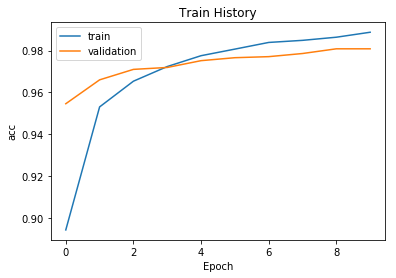

In [17]:
show_train_history(train_history,'acc','val_acc')

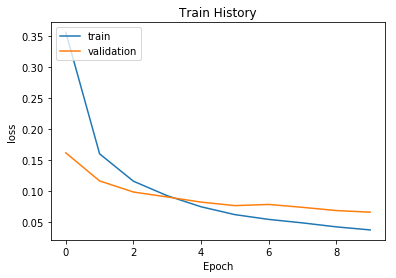

In [18]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 9920/10000 [============================>.] - ETA: 0s
accuracy= 0.9808


# 進行預測

In [20]:
prediction=model.predict_classes(x_Test)

 9888/10000 [============================>.] - ETA: 0s

In [21]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

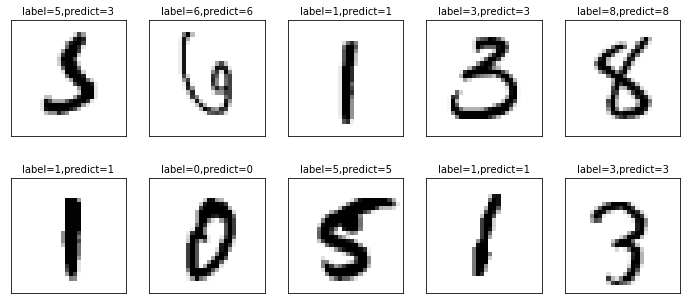

In [23]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [24]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,0,2,0,0,1,1,2,0
1,0,1127,3,0,0,0,2,0,3,0
2,6,1,1006,3,3,0,2,6,5,0
3,1,0,0,1000,0,1,0,3,3,2
4,1,0,4,0,966,0,1,1,2,7
5,3,0,0,15,1,861,4,1,5,2
6,6,2,0,1,6,3,937,0,3,0
7,2,3,8,3,1,0,0,1006,3,2
8,5,0,1,5,4,1,1,2,953,2


In [25]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [26]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3


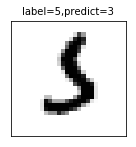

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

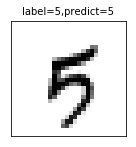

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)